<Figure size 640x480 with 0 Axes>

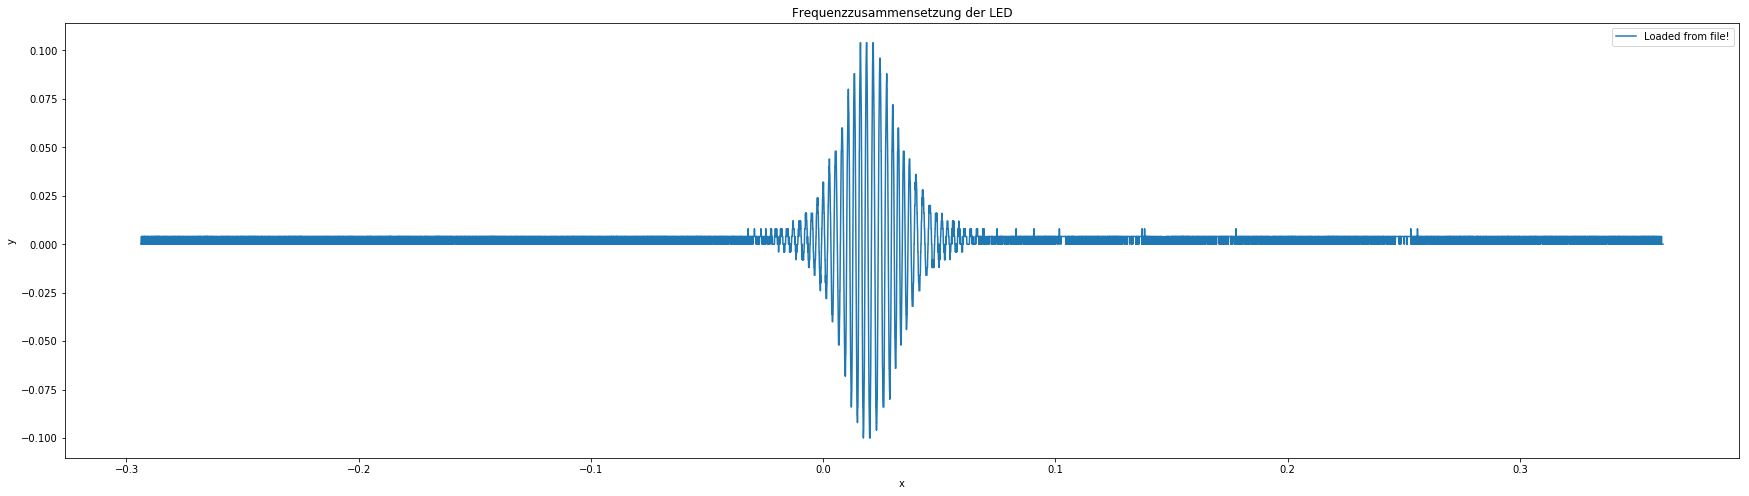

<Figure size 640x480 with 0 Axes>

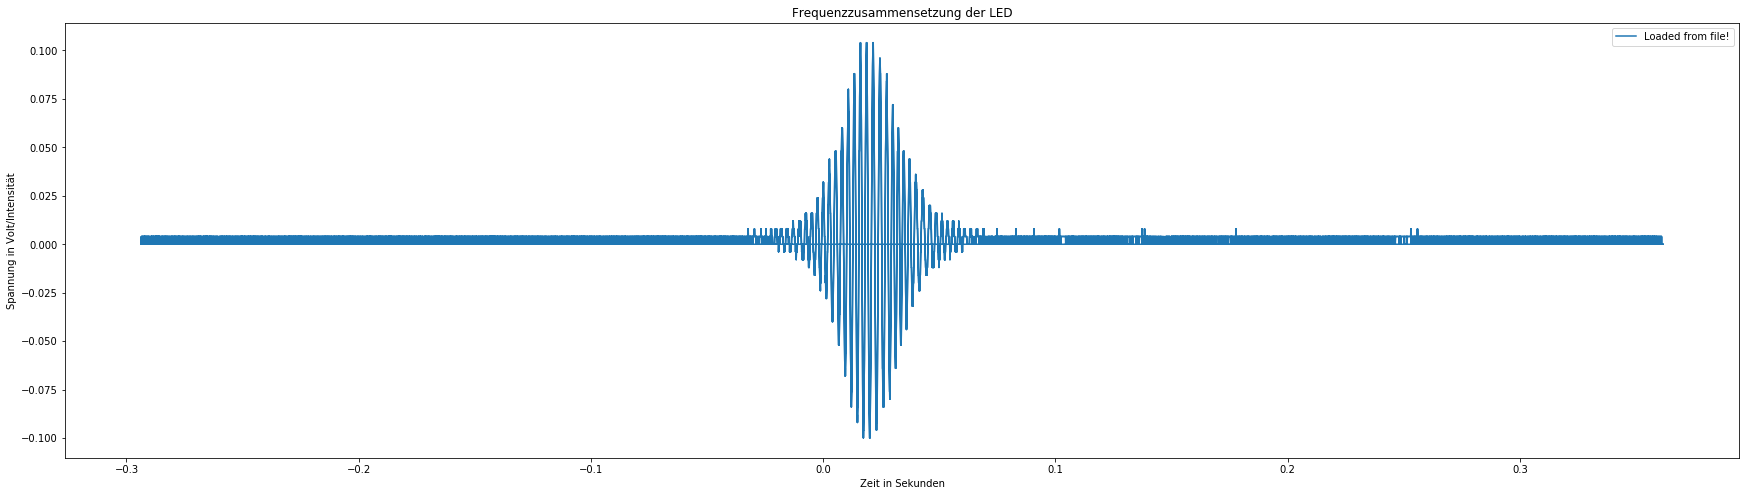

<Figure size 640x480 with 0 Axes>

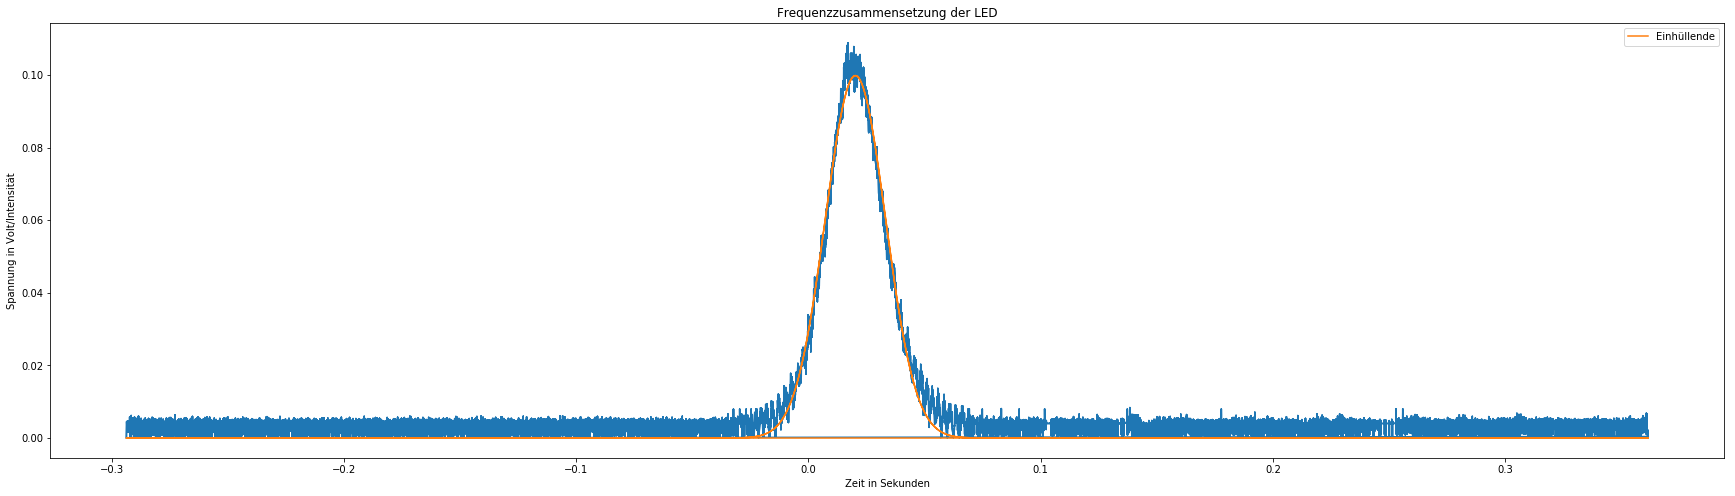

A =  0.003236171350747355
mu =  0.020237110402601163
sigma = 0.012936907430340688


In [19]:

import numpy as np
import matplotlib.pyplot as plt 
import csv

from scipy.signal import hilbert
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure 
%matplotlib inline 
a = [] 
b = []
with open('Desktop/Messung Kohärenzlänge1.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter=',') 
    for row in plots: 
        a.append(float(row[0])) 
        b.append(float(row[1])) 
#print(csvfile.read())
#a und b werden zur einfacheren Handhabung in np.arrays konvertiert und 
#die Werte geplotted
x_1=np.array(a)
y_1=np.array(b) 
x_2=x_1[y_1>0] 
y_2=y_1[y_1>0] 
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k') 
figure(figsize=(30,8)) 
plt.plot(a,b, label='Loaded from file!') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Frequenzzusammensetzung der LED') 
plt.legend() 
plt.show()
#jetzt wird der Fit gemacht: hier wird die Gaussian definiert 
from numpy import exp, pi, sqrt 
def gaussian(x, mu, sigma, A): 
    return A / (sigma * sqrt(2 * pi)) * exp(-(x - mu)**2 / sigma**2 / 2) 
with open('Desktop/Messung Kohärenzlänge1.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter=',') 
    for row in plots: 
        a.append(float(row[0])) 
        b.append(float(row[1]))
        #print(csvfile.read()) 
x_1=np.array(a) 
y_1=np.array(b) 
x_2=x_1[y_1>0] 
y_2=y_1[y_1>0]
#hier wird der curve fit ausgeführt und über den frequenzplot gesetzt
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k') 
figure(figsize=(30,8)) 
plt.plot(a,b, label='Loaded from file!') 
plt.xlabel('Zeit in Sekunden') 
plt.ylabel('Spannung in Volt/Intensität') 
plt.title('Frequenzzusammensetzung der LED') 
plt.legend() 
plt.show()
#print(popt1[2]) #t2=t[np.where(max_mask)] #a2=a1[np.where(max_mask) #t2_corr =t2[a2>0] #a2_corr =a2[a2>0]
# die hilbert funktion generiert eine einhüllende, indem sie die maxima herauspickt, danach wird alles geplotted 
analytic_signal = hilbert(y_1, axis = 0) 
amplitude_envelope = np.abs(analytic_signal) 
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k') 
figure(figsize=(30,8)) 
plt.plot(x_1, amplitude_envelope) 
popt2, pcov2 = curve_fit(gaussian,x_1, amplitude_envelope) 
plt.plot(x_1,gaussian(x_1, *popt2),label="Einhüllende") 
plt.xlabel('Zeit in Sekunden') 
plt.ylabel('Spannung in Volt/Intensität') 
plt.title('Frequenzzusammensetzung der LED') 
plt.legend() 
plt.show() # komischerweise sind die sigma und mu Werte negativ. ich habe aber unten mit der rausindenteten funktion ausprobiert # ob die negativität einen einfluss hat. hat sie nicht. ich habe also die beträge genommen print("mu = ",popt2[0]) print("sigma =",abs(popt2[1]))

print("A = ",abs(popt2[2])) #plt.plot(x_1, gaussian(x_1, 0.035, 0.015, 0.005))
print("mu = ",popt2[0]) 
print("sigma =",abs(popt2[1]))


In [11]:
plots